<a href="https://colab.research.google.com/github/Byrnesz/point-of-interest-data/blob/master/Guide_Build_Customer_Demographic_Profile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://global-uploads.webflow.com/5baafc2653bd67278f206724/5be267a03f7813daf821b31e_safegraph-logo-hidpi%403x-p-500.png)

# An Interactive Guide To Analyze Demographic Profiles from SafeGraph Patterns Data

--------------
**[Ryan Fox Squire](https://www.linkedin.com/in/ryanfoxsquire/) | Data Scientist, [SafeGraph](https://safegraph.com/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=demo_profile_teachernotebook)**


Nov 2019

--------------
This notebook is 1 of 2 Google Co-Lab notebooks complementing a [Blog Series](https://www.safegraph.com/blog/safegraphs-data-on-brick-and-mortar-customer-demographics-is-the-most-accurate-foot-traffic-dataset/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=demo_profile_teachernotebook) focused on analyzing customer demographics using SafeGraph data.  This is the Teacher notebook. It teaches you how-to, and details all the data-wrangling and statistical methodology step by step. In contrast, to leverage the functionality without all the pedagogy, checkout the second accompanying [Demographics Analysis Workbook](https://colab.research.google.com/drive/13BmucZMu0-UFNnVKoJP4ZuJpGNyQXLln#sandboxMode=true&scrollTo=HvvkFI_AyM-0).


--------------
*Share this notebook: [Shareable Link](https://colab.research.google.com/drive/1qqLRxehVZr1OBpnbHRRyXPWo1Q98dnxA#offline=true&sandboxMode=true)*

## Do we even need to explain why demographics are important? 


 <img src="https://user-images.githubusercontent.com/6432906/68722357-1bac9e00-05ad-11ea-813c-a235557a751a.png" alt="Demographics" ALIGN="middle" width=800>

At the core of every business strategy, every marketing strategy, every product strategy is the question: Who are my customers? 

[Demography](https://en.wikipedia.org/wiki/Demography), or [demographic analysis](https://en.wikipedia.org/wiki/Demographic_analysis), is the statistical study of populations. In business, [demographic profiles](https://en.wikipedia.org/wiki/Demographic_profile) are descriptions of your customers (or potential customers) along various dimensions such as Age, Gender, Race, Ethnicity, Income, Education, Marital Status, Geography, etc. 

Understanding who are your customers (and the customers of your competitors and your compliments) is a powerful tool to positively impact many aspects of your business such as marketing, inventory planning, real estate decisions, product development, and more. Making good decisions for your business depends on wielding an accurate understanding of your customers. And having views on the customers of your competitors and your compliments can provide additional benefits.







## How do businesses typically conduct demographic analysis? 

There are broadly 3 methods used today to generate demographic profiles for your business

1. Surveys
2. Marketing data based on emails, phone numbers or other identity information
3. Drive-time catchment areas & the Census

These methods each have strengths but they all have important limitations. 

**Surveys** are costly, time-consuming, and it is difficult to get good coverage (survey completion rates are low). You also have to worry about sampling bias for who actually completes the survey. Did only my most loyal customers complete the survey? 

**Marketing Data** typically starts with customer loyalty programs which collect email addresses, phone numbers or other identity information. Then you purchase marketing datasets tied to these identifiers. There are a few problems. First, opt-in loyalty members represent a small and probably skewed slice of your customer base, so you have to worry about sampling bias. Second, the data is expensive. Third, [marketing data are not very accurate anyway](https://adexchanger.com/data-driven-thinking/future-marketing-data-accuracy-trumps-everything/). Bummer. 

**Drive-time catchement areas** put a pin on a map for the location of your business, then analyze all of the census demographic data for all homes located within 15 minute driving distance of your business. These are powerful GIS approaches to studying demographics. The limitation is that they assume people only visit businesses geographically nearby their homes. What about people that commute to work and visit businesses near their work locations? What about high tourist areas? Furthermore, these methods cannot capture nuances of customer segmentation within geographic areas. According to drive-time catchment analysis, a nail salon, a pet store and a hardware store sitting adjacent to each other in a mall all have identical customer demographics.

Finally, these most of these methods may give you a picture of your own customers, but you care about more than just your own customers. How do you get any data on customers of your competitors and compliments?








## **With SafeGraph Patterns you can analyze demographic profiles for any store, any brand, any geography, any business.** 

Here we show a new approach for building demographic profiles using [SafeGraph Patterns](https://docs.safegraph.com/docs/places-schema#section-patterns/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=demo_profile_teachernotebook) data. 


### **What is SafeGraph Patterns?**

SafeGraph Patterns is a dataset about commercial brick-and-mortar points-of-interest (POI) and includes anonymized counts of how many people visit these POI each month. The counts of visitors are derived from an anonymized [panel](https://en.wikipedia.org/wiki/Panel_data) (sample of population that is measured longitudinally) of ~46MM mobile devices (e.g., smart phones) in the USA.

These counts are broken down by different dimensions, including by the **home census block group of the visitor**. For example, the dataset may report that 85 total devices visited a specific POI. It also reports that 50 of those visitors live in census block group X, 25 live in census block Y, and 10 live in census block group Z.


SafeGraph provides an aggregated summary of the panel called [Home Location Distributions by State/Census Block Group](https://docs.safegraph.com/docs/places-schema#section-home-location-distributions-by-state-census-block-group/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=demo_profile_teachernotebook), as part of the Panel Overview Data. This is an important reference which we will use to [quantify and correct for sampling bias.](https://blog.safegraph.com/what-about-bias-in-the-safegraph-dataset?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=demo_profile_teachernotebook)


### **If the data is anonymized and aggregated, then how do we estimate demographics?**
Protecting individual consumer privacy is at the core of the SafeGraph mission:  
> "SafeGraph’s mission is to make the world’s data open for innovation while protecting individuals privacy." - [SafeGraph Vision and Values](https://blog.safegraph.com/safegraph-vision-and-values-circa-2017?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=demo_profile_teachernotebook)

The devices in the panel are fully anonymized; **no device-level demographic data exists for devices in the panel**. Instead, for every device in the panel, SafeGraph accurately *derives* the home census block group (CBG) of that device, based on the most common location during night time hours. Importantly, none of the anonymized device-specific data is available to customers of SafeGraph; SafeGraph Patterns is an aggregated view. 

Aggregations at the level of census block groups (CBGs) is all we need. [The Census](https://www.safegraph.com/open-census-data/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=demo_profile_teachernotebook) reports demographic data at the level of each CBG. This allows us to build an average demographic profile based on the derived home CBGs for customers visiting a particular store. There are over 220,000 CBGs in the USA, with an mean population of ~ 1500 persons per CBG. This provides us a relatively precise demographic picture, as we will show below.

**The aggregated form of SafeGraph Patterns helps to ensure the protection of individuals' privacy, while also providing actionable data for statistical analysis and data science.** For all the details on SafeGraph Patterns, see the [SafeGraph Patterns docs](https://docs.safegraph.com/docs/places-schema#section-patterns/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=demo_profile_teachernotebook). 


## **Here we teach all the steps to build a customer demographic profile using SafeGraph Patterns data**

*To execute this analysis without all the pedagogy, checkout the accompanying [Demographics Analysis Workbook](https://colab.research.google.com/drive/13BmucZMu0-UFNnVKoJP4ZuJpGNyQXLln#sandboxMode=true&scrollTo=HvvkFI_AyM-0).*



# **How to use this notebook**


---
**Quick Start:** 
1. Just read through the notebook and see the results from my code. I hope you learn something! Enjoy!

**More: I want to play with the notebook** 
1. You can re-run and tinker with everything in this notebook using pre-loaded data.  You only need to do one thing: In the cell containing `your_name = "EDIT YOUR NAME"`, you should edit your name, run the cell, and follow the prompts to authenticate your google account. 
2. Everything else will just run! Enjoy!

**Even more: I want to use my own Patterns data**
1. Use the [Analysis Workbook](https://colab.research.google.com/drive/13BmucZMu0-UFNnVKoJP4ZuJpGNyQXLln#offline=true&sandboxMode=true) and follow instructions for "Customize Your Analysis". While *this* notebook will teach you about all the steps, the *Analysis Workbook* is designed to just give you results using your own data. 

In [0]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# special libraries to allow file access
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# We will take advantage of some helper functions I've written: https://github.com/ryanfoxsquire/safegraph_demo_profile/blob/8128cacb4ae34664c8a7d2bbfc619aa9b54cf36d/demo_profile_functions/demo_profile_functions.py
! pip install -q --upgrade git+https://github.com/ryanfoxsquire/safegraph_demo_profile
from demo_profile_functions import demo_profile_functions as dpf

In [0]:
your_name = "EDIT_YOUR_NAME_HERE" # << You should edit this
################################
# These commands allow you to read directly from SafeGraph's public GoogleDrive containing Census Data
print("Hello {0}, you will be asked to authenticate for Google Cloud SDK\nPlease follow direction and copy/paste your auth code when prompted.".format(your_name))
auth.authenticate_user()  # Authenticate and create the PyDrive client. 
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
print("Well done, {0}! You are fully authenticated and can edit and re-run everything in the notebook. Enjoy!".format(your_name))

Hello EDIT_YOUR_NAME_HERE, you will be asked to authenticate for Google Cloud SDK
Please follow direction and copy/paste your auth code when prompted.
Well done, EDIT_YOUR_NAME_HERE! You are fully authenticated and can edit and re-run everything in the notebook. Enjoy!


# What exactly is a demographic profile? A simple end-to-end example.

A demographic profile is just a description of your customers (or potential customers) along various dimensions such as Age, Gender, Race, Ethnicity, Income, Education, Marital Status, Geography, etc.

To make this concrete, let's show a end-to-end example. To make the example and calculations super simple we will examine only a *single* POI location (a Walmart), and a *single* demographic dimension (Ethnicity) with only *two* demographic segments (`Hispanic or Latino` or `Not Hispanic or Latino`, more details below). 

The POI we will examine is a Walmart (`SG_BRAND_04a8ca7bf49e7ecb4a32451676e929f0`) located at **3141 Garden Rd, Burlington, NC 27215, US** (`safegraph_place_id = sg:23540fe68cb14f3b9bf848fda3e848fc`). 


 <img src="https://user-images.githubusercontent.com/6432906/68523711-b9098880-02b4-11ea-912e-a3a3108a5ec2.png" alt="sg:23540fe68cb14f3b9bf848fda3e848fc" ALIGN="middle" width=400>

*Geospatial polygon data courtesy of [SafeGraph Geometry](https://docs.safegraph.com/docs/places-schema#section-geometry/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=demo_profile_teachernotebook).* 




## Read SafeGraph Patterns Data

In [0]:
%%time
patterns_drive_id = dpf.get_drive_id('core_poi-patterns.csv') # This is the patterns.csv from SafeGraph on a public GDrive
patterns_df = dpf.pd_read_csv_drive(patterns_drive_id, drive=drive)
print(patterns_df.shape)

(69133, 38)
CPU times: user 1.51 s, sys: 438 ms, total: 1.94 s
Wall time: 3.38 s


In [0]:
my_sgpid_list = ['sg:23540fe68cb14f3b9bf848fda3e848fc'] # The particular Walmart we will analyze
poi_walmart = patterns_df[patterns_df.safegraph_place_id.isin(my_sgpid_list)] 
print(poi_walmart.shape)
poi_walmart.head()

(1, 38)


,safegraph_place_id,parent_safegraph_place_id,location_name,safegraph_brand_ids,brands,top_category,sub_category,naics_code,latitude,longitude,street_address,primary_number,street_predirection,street_name,street_postdirection,street_suffix,city,region,postal_code,iso_country_code,phone_number,open_hours,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,visitor_home_cbgs,visitor_work_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type
28171,sg:23540fe68cb14f3b9bf848fda3e848fc,sg:665f80a2f483482c899c5fdbf2b65630,Walmart,SG_BRAND_04a8ca7bf49e7ecb4a32451676e929f0,Walmart,"General Merchandise Stores, including Warehous...",All Other General Merchandise Stores,452319,36.072151,-79.499022,3141 Garden Rd,3141,NaN,Garden,NaN,Rd,Burlington,NC,27215,US,NaN,"{ ""Mon"": [[""9:00"", ""19:00""]], ""Tue"": [[""9:00"",...",1.567296e+09,1.569888e+09,7666.0,4149.0,"[329,343,200,179,187,276,339,299,211,202,220,2...","{""370810152003"":136,""370010217031"":125,""370010...","{""370010217031"":69,""370010216001"":61,""37001021...","{""US"":4026}",10379.0,21.0,"{""<5"":146,""5-20"":3337,""21-60"":3166,""61-240"":72...",{},"{""Food Lion"":48,""McDonald's"":40,""Dollar Genera...","[205,181,156,154,165,201,246,304,398,529,690,8...","{""Monday"":1160,""Tuesday"":814,""Wednesday"":787,""...","{""android"":1929,""ios"":2228}"


We care about the column `visitor_home_cbgs`, which contains the visitor data broken down by the visitor home census block group. The column is organized as a JSON with many key : values, i.e., `"census_block_group_id" : visitor_count`. 

In [0]:
# show an example of visitor_home_cbgs
print(poi_walmart.visitor_home_cbgs.iloc[0])

{"370810152003":136,"370010217031":125,"370010217032":94,"370810172003":84,"370010218011":82,"370010216004":77,"370010216003":66,"370810152002":60,"370010216002":55,"370010205011":52,"370810172002":51,"370010215004":46,"370010217021":46,"370010217012":45,"370810170002":44,"370810153002":43,"370010209021":41,"370010215002":41,"370010218012":39,"370810172001":39,"370010218021":38,"370010206013":38,"370010207012":36,"370010219012":36,"370010207023":35,"370010209013":35,"370010207011":34,"370010207013":34,"370810153001":34,"370810153003":33,"370010207014":32,"370010215001":32,"370010211012":30,"370010218022":30,"370010205021":29,"370010219013":29,"370010208012":28,"370339305003":28,"370010218013":27,"370010207024":26,"370010217011":26,"370810151001":26,"370010206022":26,"370010219023":26,"370010213001":25,"370010204001":25,"370010218031":25,"370010220011":25,"370010205012":25,"370010208011":25,"370010216001":24,"370010220012":24,"370010201001":24,"370010207021":23,"370010217022":23,"370010

To make it easy for analysis, we need to [explode this json data into its own dataset](https://docs.safegraph.com/docs/faqs#section-how-do-i-work-with-the-patterns-columns-that-contain-json-/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=demo_profile_teachernotebook). 

I've created a function called `vertically_explode_json()` for [reference here](https://github.com/ryanfoxsquire/safegraph_demo_profile/blob/8128cacb4ae34664c8a7d2bbfc619aa9b54cf36d/demo_profile_functions/demo_profile_functions.py#L265). 

In [0]:
home_visitor_cbgs_walmart = dpf.vertically_explode_json(poi_walmart)
print(home_visitor_cbgs_walmart.shape)
print("total cbg visits: {0}".format(home_visitor_cbgs_walmart.visitor_count.sum()))
home_visitor_cbgs_walmart.head(5)

(134, 3)
total cbg visits: 3223


,safegraph_place_id,visitor_home_cbg,visitor_count
0,sg:23540fe68cb14f3b9bf848fda3e848fc,370810152003,136
1,sg:23540fe68cb14f3b9bf848fda3e848fc,370010217031,125
2,sg:23540fe68cb14f3b9bf848fda3e848fc,370010217032,94
3,sg:23540fe68cb14f3b9bf848fda3e848fc,370810172003,84
4,sg:23540fe68cb14f3b9bf848fda3e848fc,370010218011,82


Now each row is a unique pair of a `safegraph_place_id` (sgpid) and a home census block group (`visitor_home_cbg`). (And as a reminder, in this example we are only looking at a single POI, so every value of `home_visitor_cbgs_walmart.safegraph_place_id` is the same)

So, there were a total of 3223 unique visitors, coming from 134 unique census block groups. 

We don't know any demographic data about those individual visitors, but we can use the Census data to know what are the average demographics of people that live in each CBG. So, for each of those CBGs, let's look up the fraction of residents that are `Hispanic or Latino` vs `Not Hispanic or Latino`. 

## Load Open Census Data
#### SafeGraph's Open Census Data is your friend!

Census data can be be difficult to navigate, so SafeGraph [packaged all of it in a convenient single download called Open Census Data](https://blog.safegraph.com/download-open-census-data-visualize-neighborhood-insights?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=demo_profile_teachernotebook).  This notebook is pulling Open Census Data from a public Google Drive created by SafeGraph.  

If you want your own copy of Open Census Data, you can [download Open Census Data here](https://www.safegraph.com/open-census-data/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=demo_profile_teachernotebook). See the [SafeGraph Open Census Data docs](https://docs.safegraph.com/docs/open-census-data/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=demo_profile_teachernotebook) for documentation on what is included and how the files are organized.


#### In this example, we analyze `Latino or Hispanic Origin` Ethnicity. 

The census tracks this data under the category `Hispanic Or Latino Origin`, and we can look this up in the handy file from Open Census Data called [`cbg_field_descriptions.csv`](https://drive.google.com/file/d/1a7_7WxY6eaUIObkVwfknl9C7nPltYxPd/view?usp=sharing) to see that the two `table_id`s we want are: 
* `B03003e2	HISPANIC OR LATINO ORIGIN: Not Hispanic or Latino: Total population -- (Estimate)`
*` B03003e3	HISPANIC OR LATINO ORIGIN: Hispanic or Latino: Total population -- (Estimate)`

Going forward I will abbreviate these two groups as `Not Hispanic` and `Hispanic`, respectively. 

The Census counts every citizen in one of these two categories, so for each CBG we can use these `table_id`s and convert them into a relative fraction. 

In [0]:
hispanic_demo_codes = ['B03003e2','B03003e3']
census_df_hispanic = dpf.pd_read_csv_drive(dpf.get_drive_id('cbg_b03.csv'), drive=drive, dtype = {'census_block_group': str})
census_df_hispanic = census_df_hispanic[['census_block_group'] + hispanic_demo_codes] # select only the columns we want

demo_totals_hispanic = census_df_hispanic[hispanic_demo_codes].sum(axis=1) # the sum of Hispanic and Not Hispanice for each CBG
for this_code in hispanic_demo_codes:
        census_df_hispanic[this_code+"_frac"] = census_df_hispanic[this_code] / demo_totals_hispanic
census_df_hispanic.head()

,census_block_group,B03003e2,B03003e3,B03003e2_frac,B03003e3_frac
0,010010201001,729,16,0.978523,0.021477
1,010010201002,1228,37,0.970751,0.029249
2,010010202001,947,13,0.986458,0.013542
3,010010202002,1221,15,0.987864,0.012136
4,010010203001,2136,228,0.903553,0.096447


We join the Census data and the SafeGraph Patterns data together on `census_block_group`.

In [0]:
visitors_df_walmart = pd.merge(home_visitor_cbgs_walmart, poi_walmart[['safegraph_place_id', 'brands']])
visitors_join_walmart = pd.merge(visitors_df_walmart,census_df_hispanic, left_on='visitor_home_cbg', right_on='census_block_group').drop('visitor_home_cbg',axis='columns')
print(visitors_join_walmart.shape)
visitors_join_walmart.head()

(134, 8)


,safegraph_place_id,visitor_count,brands,census_block_group,B03003e2,B03003e3,B03003e2_frac,B03003e3_frac
0,sg:23540fe68cb14f3b9bf848fda3e848fc,136,Walmart,370810152003,4213,47,0.988967,0.011033
1,sg:23540fe68cb14f3b9bf848fda3e848fc,125,Walmart,370010217031,2822,62,0.978502,0.021498
2,sg:23540fe68cb14f3b9bf848fda3e848fc,94,Walmart,370010217032,2466,362,0.871994,0.128006
3,sg:23540fe68cb14f3b9bf848fda3e848fc,84,Walmart,370810172003,2357,24,0.989920,0.010080
4,sg:23540fe68cb14f3b9bf848fda3e848fc,82,Walmart,370010218011,2042,0,1.000000,0.000000


Great! Now we have one row for every home `census_block_group` (CBG), and a few columns for our different data points. The counts of visitors that visited our Walmart POI **from** that home CBG (`visitor_count`), and the relative fraction of Not Hispanic vs Hispanic residents of that CBG (`B03003e2_frac` and `B03003e3_frac`, respectively). 

We are forced to assume that the visitors within a CBG are all average members of that CBG. Therefore, if I am a visitor from CBG `370010217032` (listed above), then I will count as 0.871994 persons `Not Hispanic` and 0.128006 persons `Hispanic`. 

So, we multiply the total `visitor_count` by the fraction of each demographic group (e.g. Hispanic vs Not Hispanic) to get the "demographic adjusted" count which we abbreviate as `_D_adj`.



In [0]:
demos_walmart = visitors_join_walmart.copy()

for dc in hispanic_demo_codes:
    demos_walmart['visitor_count_'+dc+'_D_adj'] = demos_walmart[dc+'_frac'] * demos_walmart['visitor_count'] 
    
print(demos_walmart.shape)
demos_walmart[['safegraph_place_id','brands', 'census_block_group', 'visitor_count', 'B03003e2_frac', 'B03003e3_frac', 'visitor_count_B03003e2_D_adj', 'visitor_count_B03003e3_D_adj']].head()

(134, 10)


,safegraph_place_id,brands,census_block_group,visitor_count,B03003e2_frac,B03003e3_frac,visitor_count_B03003e2_D_adj,visitor_count_B03003e3_D_adj
0,sg:23540fe68cb14f3b9bf848fda3e848fc,Walmart,370810152003,136,0.988967,0.011033,134.499531,1.500469
1,sg:23540fe68cb14f3b9bf848fda3e848fc,Walmart,370010217031,125,0.978502,0.021498,122.312760,2.687240
2,sg:23540fe68cb14f3b9bf848fda3e848fc,Walmart,370010217032,94,0.871994,0.128006,81.967468,12.032532
3,sg:23540fe68cb14f3b9bf848fda3e848fc,Walmart,370810172003,84,0.989920,0.010080,83.153297,0.846703
4,sg:23540fe68cb14f3b9bf848fda3e848fc,Walmart,370010218011,82,1.000000,0.000000,82.000000,0.000000


Finally, we simply sum the number of estimated visitors from each demographic segment (Hispanics vs Not Hispanic) across all CBG (i.e., sum across all rows). We normalize those sums as a percent of total visitors, and we have a demographic profile!

In [0]:
cols_to_keep = ['brands','visitor_count', 'visitor_count_B03003e2_D_adj', 'visitor_count_B03003e3_D_adj'] 
sums_temp = demos_walmart[cols_to_keep].copy()
summs_walmart = sums_temp.groupby(['brands']).sum().reset_index()

# calculate totals as percents
total_walmart_visits = summs_walmart.visitor_count[0]
summs_walmart['B03003e3_percent'] = summs_walmart.visitor_count_B03003e3_D_adj[0] / total_walmart_visits * 100
summs_walmart['B03003e2_percent'] = summs_walmart.visitor_count_B03003e2_D_adj[0] / total_walmart_visits * 100
summs_walmart

,brands,visitor_count,visitor_count_B03003e2_D_adj,visitor_count_B03003e3_D_adj,B03003e3_percent,B03003e2_percent
0,Walmart,3223,2963.816282,259.183718,8.041692,91.958308


Figure 1


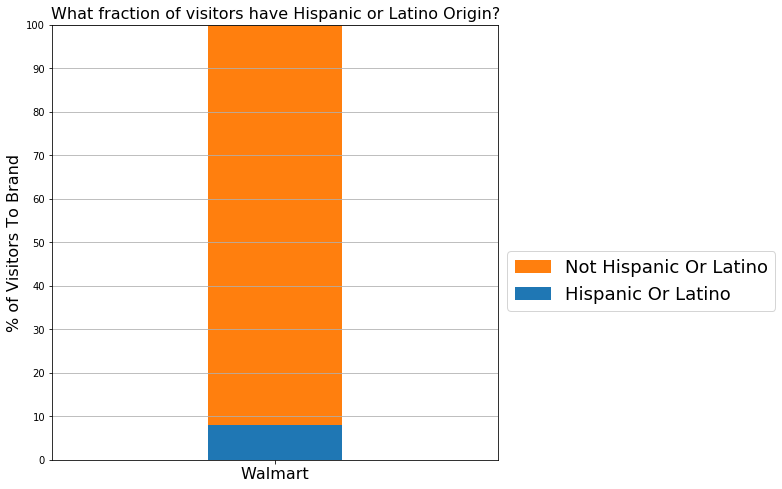

In [0]:
plt.rcParams['figure.figsize'] = [8, 8]

demos2plot = ['Hispanic Or Latino', 'Not Hispanic Or Latino']
data2plot = [summs_walmart['B03003e3_percent'].iloc[0] , summs_walmart['B03003e2_percent'].iloc[0]]

#####
# plot a stacked bar chart
print("Figure 1")

barwidth = 0.3
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(zorder=0)
p1 = ax.bar(1, data2plot[0], barwidth)
p2 = ax.bar(1, data2plot[1], barwidth, bottom=data2plot[0])

plt.ylabel("% of Visitors To Brand", size=16)
plt.title('What fraction of visitors have Hispanic or Latino Origin?', size=16)
plt.xticks([1], summs_walmart.brands, size=16)
plt.yticks(list(range(0,110,10)))
plt.legend((p1[0], p2[0]), demos2plot)
plt.xlim((.5,1.5))
plt.ylim((0,100))

handles = [p1, p2]
order = [1,0] # We reverse the legend order so it matches the order on the chart
plt.legend([handles[idx] for idx in order],[demos2plot[idx] for idx in order],fontsize=18, bbox_to_anchor=(1,0.5))
plt.show()
#####



 <img src="https://user-images.githubusercontent.com/6432906/68523711-b9098880-02b4-11ea-912e-a3a3108a5ec2.png" alt="sg:23540fe68cb14f3b9bf848fda3e848fc" ALIGN="right" width=300>

In **Figure 1**, above, we show a demographic profile of visitors to the Walmart located at **3141 Garden Rd, Burlington, NC 27215, US** (`safegraph_place_id = sg:23540fe68cb14f3b9bf848fda3e848fc`) in terms of Ethnicity. 




Let's now scale this analysis to include many locations, many brands, and many different demographic dimensions. Also, let's make it statistically and methodologically rigorous. 


# There are 3 Technical Challenges to Analyze Demographics With SafeGraph Patterns

1. **Measuring and Correcting Sampling Bias**. (See ["What About Bias In The SafeGraph Dataset?"](https://blog.safegraph.com/what-about-bias-in-the-safegraph-dataset?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=demo_profile_teachernotebook). Here we will show how to correct for sampling bias.
2. **Wrangling Census Data**. Luckily SafeGraph's **Open Census Data** makes this very easy, but there are still a lot of variables and labels to keep track of, so I've written some helper functions to make life even easier. 
3. **Quantifying Statistical Certainty**. It was relatively straightforward to calculate that ~ 8% of visitors to this Walmart are Hispanic, but ***how certain is that estimate***? Intuitively, collecting data from millions of consumers visiting 1,000s of locations should give a higher-confidence estimate than an estimate based on 100s of consumers visiting only a handful of locations (more data is better, right?). But exactly how much data do we need to be confident? Can we trust analyses based on only a single location? In the final section we show how to quantify the (un)certainty of our estimates and separate the signal from the noise.


The following sections review these technical challenges one by one. 


# \#1 Measuring and Correcting Sampling Bias



We explored the concept of Sampling Bias in ["What About Bias In The SafeGraph Dataset?"](https://blog.safegraph.com/what-about-bias-in-the-safegraph-dataset?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=demo_profile_teachernotebook). 

For example, in the above Walmart example, maybe the reason we are estimating that such a large percentage of visitors are Not Hispanic, is simply because the SafeGraph dataset is biased in favor of (i.e., over-indexed on) Not Hispanic people. This would be a "sampling bias". 

Luckily, we can rigorously quantify this bias and correct for it. 








### Correct Our Biases (Sampling Bias) via Post-Hoc Stratified Re-weighting

#### Intuition:

The SafeGraph dataset is a "sample" of the true USA population. We know there are different groups of people in the sample (i.e., people living in different census block groups). And we know the *true* frequencies of these groups of people in the overall population, because we know the true population of each census block group according to the Census. Similarly, we know the empirical frequencies of these groups of people in the SafeGraph "sample". 

By comparing the true population frequency with the frequency in our sample, we can calculate which CBGs are over or under-represented in the sample. Then we adjust (i.e., re-weight) each group in the SafeGraph sample so that each group affects our measurement proportionate to its true population frequency. In some cases this adjustment will be extrapolating up a group because they are under-indexed. In other cases it means down-weighting a sample that is over-indexed. 

#### Why is it called Post-Hoc Stratified Re-weighting?
Each group is called a stratum. It's post-hoc because we apply the correction *after* collecting the data (in contrast to [stratified sampling](https://en.wikipedia.org/wiki/Stratified_sampling/) in which one uses known population frequencies to control the data collection in the first place). Adjusting the relative frequencies up or down is called "re-weighting".



### A formula to correct for Sampling Bias

In our case we are only controlling for sampling bias in a single dimension (i.e. the geography of census block groups) and in that case the formula for  adjusting (correcting) your measurements is fairly intuitive. 


For the interested reader, if you need to control for sampling bias on multiple dimensions simultaneously, there is an elegant regression-based solution called [Heckman's Correction](https://en.wikipedia.org/wiki/Heckman_correction). If you want to learn more about Heckman's, I recommend this [implementation & tutorial](https://juliaeconomics.com/tag/heckman-correction/). 

Here we will not use Heckman's, and instead use the straight-forward stratified adjustment for a single dimension. 

#### The math behind the adjustment factor

We will adjust our measurements from each stratum (e.g., census block group) individually. 

Here is the re-weighting "formula" for each stratum: 


$$ adjust\_factor = \frac{stratum\_pop}{total\_pop} * \frac{total\_sample\_size}{stratum\_sample} $$

Where 
* $stratum\_pop$ is the population of the stratum.
* $total\_pop$ is the total population.
* $total\_sample\_size$ is the total sample size across all strata.
* $stratum\_sample$ is the number of measurements from this stratum in the sample.

<br> </br>
Another (IMHO, more intuitive) way to re-state this formula is:


$$ adjust\_factor = \frac{P(Stratum\ in\ Popluation)}{P(Stratum\ in\ Sample)} $$

<br> </br>

Note that if $P(Stratum\ in\ Popluation) > P(Stratum\ in\ Sample) $ then $adjust\_factor$ > 1; you need to over-weight your sample estimate, because your sample is  under-represented compared to the population. Vice versa if $P(Stratum\ in\ Popluation) < P(Stratum\ in\ Sample) $ then $adjust\_factor$ < 1; you need to down-weight your sample estimate, because you are over-represented in this stratum compared to the population. 

Remember, in our case, each stratum is a census block group. 

See ["Reducing Sampling Errors" by "Stratification"](https://www.emathzone.com/tutorials/basic-statistics/sampling-errors.html) for more explanation. 



### How to use the adjustment factor for stratified re-weighting? 

First, to make sure we are on the same page, let's confirm how things work if you aren't doing any corrections. Let's say you surveyed a sample of people from several different census block groups about some `outcome_variable`, e.g., `income`. To estimate the mean income across all CBGs, *without* any corrections or adjustments, you would calculate a weighted mean across all $N$ strata (e.g. census block groups), with each stratum weighted by the number of measurements (i.e. sample size) from that stratum. 

$${mean}_{uncorrected} = \frac{\sum_{n=1}^{N} \mu_n  * sample\_size_n}{N} $$

Where $\mu_n$ is the mean income of stratum $n$, and ${sample\_size}_n$ is the sample size of that stratum (i.e.,  how many people you surveyed about their income.)

But maybe most of your survey came from particularly wealthy census block groups (sampling bias). To correct for sampling bias, you re-weight each stratum. 

$${mean}_{corrected} = \frac{\sum_{n=1}^{N} \mu_n  * sample\_size_n * adjust\_factor_n}{N} $$


Where ${adjust\_factor}_n$ is as defined above. 

Effectively you are changing the "sample size" of this stratum so that its impact on your overall estimate is proportionate to the presence of this stratum in the whole population. 


----

When analyzing the relative demographic breakdown of visitors (e.g. %`Hispanic` vs % `Not Hispanic`), the "outcome_variable" is really just a count of people visiting a place. To be super precise, as far as our formulas above are concerned, we can define $\mu_n$ as the rate of visitors from $CBG_n$ to the POI or brand. That is, $\mu_n = \frac{num\_visit_n}{sample\_size_n}$. Since $\frac{num\_visit_n}{sample\_size_n} * {sample\_size} = num\_visit_n$ , the numerator reduces to just the count of visitors $num\_visit_n$ multiplied by the $adjust\_factor_n$. 

Technically, in our use case, we will actually calculate weighted *sums* of people, rather than weighted means, so our formula will look more like this: 

$${sum}_{corrected} = \sum_{n=1}^{N} num\_visit_n * adjust\_factor_n $$




### Example of Correcting Sampling Bias: A Single Walmart

Let's re-compute our Demographic Profile for the same Walmart we analyzed before (`sg:23540fe68cb14f3b9bf848fda3e848fc`).





In order to measure and correct for sampling bias, we need to load two additional datasets:
1. **`home_panel_summary.csv`** from SafeGraph Patterns. This file reports on the total sample size of the SafeGraph dataset `number_devices_residing`, broken down by home CBG. 


2. **`cbg_b01.csv`** from Open Census Data, which includes the code `B01001e1` `SEX BY AGE: Total: Total population -- (Estimate)`. We will use this code as our reference for the total USA population in each CBG.


In [0]:
home_panel = dpf.get_home_panel(None, drive=drive)
home_panel.head()

,census_block_group,number_devices_residing
0,010010201001,325
1,010010201002,152
2,010010202001,74
3,010010202002,115
4,010010203001,244


In [0]:
# B01001e1 is the census Total Population estimate
census_totals = dpf.pd_read_csv_drive(dpf.get_drive_id('cbg_b01.csv'), drive=drive, dtype = {'census_block_group': str})[['census_block_group', 'B01001e1']] 
census_totals.head()

,census_block_group,B01001e1
0,010010201001,745
1,010010201002,1265
2,010010202001,960
3,010010202002,1236
4,010010203001,2364


In [0]:
# Join all datasets together on census_block_group
visitors_join_walmart2 = dpf.join_visitors_census_and_panel(pd.merge(home_visitor_cbgs_walmart,poi_walmart[['safegraph_place_id', 'brands']]), 
                                              home_panel,
                                              census_df_hispanic,
                                              verbose=True)
visitors_join_walmart2 = pd.merge(visitors_join_walmart2, census_totals, on=['census_block_group'])
visitors_join_walmart2.head()



Shape of fully-joined dataframe: 
(134, 9)


,safegraph_place_id,visitor_count,brands,census_block_group,number_devices_residing,B03003e2,B03003e3,B03003e2_frac,B03003e3_frac,B01001e1
0,sg:23540fe68cb14f3b9bf848fda3e848fc,136,Walmart,370810152003,574,4213,47,0.988967,0.011033,4260
1,sg:23540fe68cb14f3b9bf848fda3e848fc,125,Walmart,370010217031,1343,2822,62,0.978502,0.021498,2884
2,sg:23540fe68cb14f3b9bf848fda3e848fc,94,Walmart,370010217032,494,2466,362,0.871994,0.128006,2828
3,sg:23540fe68cb14f3b9bf848fda3e848fc,84,Walmart,370810172003,346,2357,24,0.989920,0.010080,2381
4,sg:23540fe68cb14f3b9bf848fda3e848fc,82,Walmart,370010218011,358,2042,0,1.000000,0.000000,2042


We [define a function](https://github.com/ryanfoxsquire/safegraph_demo_profile/blob/8128cacb4ae34664c8a7d2bbfc619aa9b54cf36d/demo_profile_functions/demo_profile_functions.py#L539) to compute the adjust_factor. 

To distinguish this geographic-CBG-based adjustment_factor from the adjustments we made earlier to compute the demographic fractions (`_D_adj`), we will call this the correction for sampling_bias `_cbg_adj`.

In [0]:
"""
def compute_adjust_factor(df, population_col, sample_col):
    adjust_factor = df[population_col] / df[population_col].sum() * df[sample_col].sum() / df[sample_col]
    return(adjust_factor)
    
"""
print("")

In [0]:
visitors_walmart2 = visitors_join_walmart2.copy()
visitors_walmart2['cbg_adjust_factor'] = dpf.compute_adjust_factor(visitors_walmart2, 'B01001e1','number_devices_residing')
visitors_walmart2['visitor_count_cbg_adj'] = visitors_walmart2['visitor_count'] * visitors_walmart2['cbg_adjust_factor'] # apply re-weighting, re-scaling

print(visitors_walmart2.shape)
visitors_walmart2.head()

(134, 12)


,safegraph_place_id,visitor_count,brands,census_block_group,number_devices_residing,B03003e2,B03003e3,B03003e2_frac,B03003e3_frac,B01001e1,cbg_adjust_factor,visitor_count_cbg_adj
0,sg:23540fe68cb14f3b9bf848fda3e848fc,136,Walmart,370810152003,574,4213,47,0.988967,0.011033,4260,0.940995,127.975360
1,sg:23540fe68cb14f3b9bf848fda3e848fc,125,Walmart,370010217031,1343,2822,62,0.978502,0.021498,2884,0.272276,34.034471
2,sg:23540fe68cb14f3b9bf848fda3e848fc,94,Walmart,370010217032,494,2466,362,0.871994,0.128006,2828,0.725842,68.229165
3,sg:23540fe68cb14f3b9bf848fda3e848fc,84,Walmart,370810172003,346,2357,24,0.989920,0.010080,2381,0.872515,73.291284
4,sg:23540fe68cb14f3b9bf848fda3e848fc,82,Walmart,370010218011,358,2042,0,1.000000,0.000000,2042,0.723207,59.302952


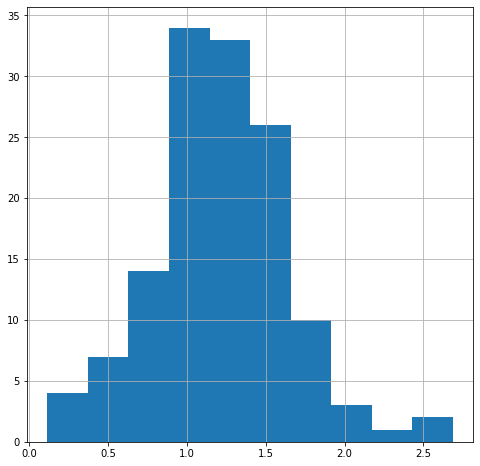

In [0]:
visitors_walmart2.cbg_adjust_factor.hist()

Inspecting the `cbg_adjust_factor` shows that for some CBGs the SafeGraph data is very proportionally representative,but for others the SafeGraph data is very over or under-indexed. when `cbg_adjust_factor < 1`, SafeGraph is over-indexed relative to population.

----

We now repeat our steps to visualize the profile before and after the stratified re-weighting correction. 

In [0]:
demos_walmart2 = visitors_walmart2.copy()

columns_to_keep = []
for dc in hispanic_demo_codes:
    demos_walmart2['visitor_count_cbg_adj_'+dc+'_D_adj'] = demos_walmart2[dc+'_frac'] * demos_walmart2['visitor_count_cbg_adj'] # This is our corrected estimate, as a fraction
    demos_walmart2['visitor_count_'+dc+'_D_adj'] = demos_walmart2[dc+'_frac'] * demos_walmart2['visitor_count'] # We keep track of the non-corrected measurement for stats purposes (explained in Section 3)
    columns_to_keep = columns_to_keep + ['visitor_count_'+dc+'_D_adj', 'visitor_count_cbg_adj_'+dc+'_D_adj']

columns_to_keep = ['brands','visitor_count', 'visitor_count_cbg_adj'] + columns_to_keep
sums_temp2 = demos_walmart2[columns_to_keep].copy()
summs_walmart2 = sums_temp2.groupby(['brands']).sum().reset_index() # Sum all rows (all CBGs)
summs_walmart2

,brands,visitor_count,visitor_count_cbg_adj,visitor_count_B03003e2_D_adj,visitor_count_cbg_adj_B03003e2_D_adj,visitor_count_B03003e3_D_adj,visitor_count_cbg_adj_B03003e3_D_adj
0,Walmart,3223,3560.826948,2963.816282,3239.744634,259.183718,321.082314


So, `visitor_count_cbg_adj_B03003e3_D_adj` is our corrected estimate of the total number of visitors to Walmart from the demographic group `B03003e3` (`Hispanic Or Latino Origin`). 

* `_cbg_adj` is shorthand for the census_block_group-based geographic stratified correction
* `_D_adj` is shorthand for the demographic adjustment. This is the product of our original visitor_count multplied by the demographic fraction. 

We've dropped other columns. 

Figure 2
[8.04, 9.02, 91.96, 90.98]


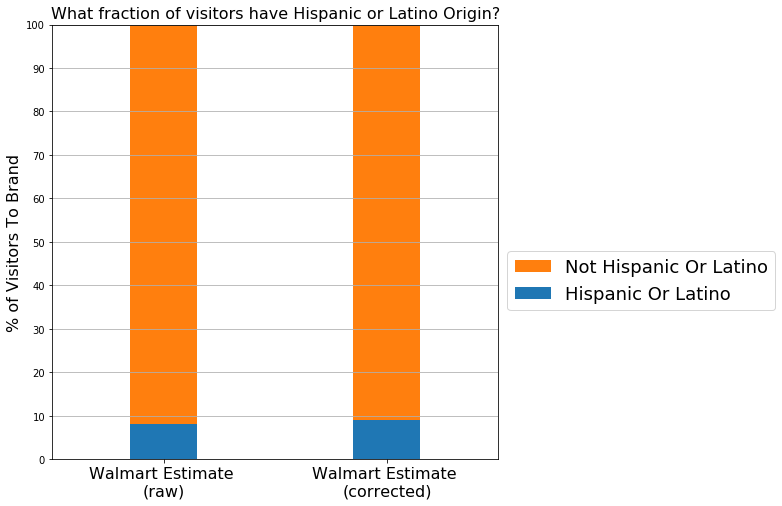

In [0]:
print("Figure 2")
demos2plot2 = ['Hispanic Or Latino', 'Not Hispanic Or Latino']
totals2 = [summs_walmart2.visitor_count[0],summs_walmart2.visitor_count_cbg_adj[0]]
data2plot2 = [summs_walmart2.visitor_count_B03003e3_D_adj[0] / totals2[0] * 100 , 
             summs_walmart2.visitor_count_cbg_adj_B03003e3_D_adj[0] / totals2[1] * 100 , 
             summs_walmart2.visitor_count_B03003e2_D_adj[0] / totals2[0] * 100,
             summs_walmart2.visitor_count_cbg_adj_B03003e2_D_adj[0] / totals2[1] * 100
            ]
print([round(datum,2) for datum in data2plot2]) 

barwidth = 0.3
idx = [1,2]

plt.rcParams['figure.figsize'] = [8, 8]
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(zorder=0)
p1 = ax.bar(idx, data2plot2[0:2], barwidth)
p2 = ax.bar(idx, data2plot2[2:4], barwidth, bottom=data2plot2[0:2])

plt.ylabel("% of Visitors To Brand", size=16)
plt.title('What fraction of visitors have Hispanic or Latino Origin?', size=16)
plt.xticks(idx, [summs_walmart2.brands[0] + ' Estimate \n(raw)',summs_walmart2.brands[0] + ' Estimate \n(corrected)'] , size=16)
plt.yticks(list(range(0,110,10)))
plt.legend((p1[0], p2[0]), demos2plot2)
plt.xlim((idx[0] - 0.5, idx[-1] + .5))
plt.ylim((0,100))

handles2 = [p1, p2]
order2 = [1,0] # We want to reverse the legend order so it matches the order on the chart
plt.legend([handles2[idx] for idx in order2],[demos2plot2[idx] for idx in order2],fontsize=18, bbox_to_anchor=(1,0.5))
plt.show()



We've printed the values of each bar at the top for reference.

According to the uncorrected SafeGraph counts, about 8% of the customers to this Walmart are in the category `Hispanic or Latino Origin` (left-side blue bar). 

However, as it turns out, across these ~130 census block groups that patron this Walmart, the SafeGraph dataset is relatively under-indexed on the CBGs with larger Hispanic populations. Since we know this, we use the stratified re-weighting to under-weight CBGs with fewer hispanic populations and overweight CBGs with larger hispanic populations. This gives us a new revised estimate that about 9% customers are `Hispanic or Latino Origin` (right-side blue bar). 

The correction isn't very large because, overall, the SafeGraph panel is not very biased on different Ethnicities. However, 8% vs 9% is an ~ 11% difference and is not inconsequential. If you are estimating projected revenue for your business over the next year based on this demographic analysis, an 11% error could potentially cause serious problems. 

Moreover, we can now have confidence that the demographic profile we are reporting is not just an artifcat of sampling bias in the SafeGraph dataset. 



# \#2 Wrangling Census Data 
**Organizing and Linking Census Data to SafeGraph Patterns**

The code above was relatively straightforward for a single location and a single dimension with only two demographic segments.  But we want to analyze many demographic dimensions across many locations and many brands. 

We've already seen how [Open Census Data](https://www.safegraph.com/open-census-data/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=demo_profile_teachernotebook) makes this much, much easier because all the data has been pre-organized into a single download. 


Some of the most common demographic dimensions our customers care about are: 
1. Age aka `Sex By Age`
2. `Race`
3. Ethnicity aka `Hispanic Or Latino Origin`
4. Education aka `Educational Attainment For The Population 25 Years And Over`
5. Income aka `Aggregate Household Income In The Past 12 Months (In 2016 Inflation-Adjusted Dollars)`

One of the key sources of complexity for wrangling the Census data is that the Census often reports data at a higher granularity than you need or want. For example, the census reports on ***16 different levels*** of Annual Household Income. But at least for my initial analysis, I'd rather reduce this to 3 groups: 
1. `Less than $59,000` 
2. `$60,000 To $99,000` 
3. `$100,000 Or More`

This isn't complicated, but re-aggregating census variables in code takes up some space, and there are tedious details and codes to keep track of. 

In the repository [`safegraph_demo_profile`](https://github.com/ryanfoxsquire/safegraph_demo_profile/blob/master/demo_profile_functions/demo_profile_functions.py) I have pre-organized all of the `table_id` codes for all of the relevant Census measures into aggregations that I think are a useful starting point. For example, [here is the relevant function for aggregating the Census data into my 3 levels of Household Income](https://github.com/ryanfoxsquire/safegraph_demo_profile/blob/master/demo_profile_functions/demo_profile_functions.py#L66), called `get_household_income_groups()`. The framework is easy to adapt to different and new aggregations, if you want. 

Finally, we want to easily analyze any number of POI, whether it is a single location or every POI in a brand. We also want to easily compare brands to each other. The helper functions also make this easy. 

To show off exactly how easy, let's expand our analysis question: What are the differences in the demographics of customers to Target vs Walmart? 


### What are the differences in the demographics of customers of Target vs Walmart? 

Now we will analyze not a single location, but all locations of Target and Walmart. Furthermore we will analyze not a single demographic dimension but 5. 

In [0]:
# EDIT THIS to adjust which demographic dimensions you want to analyze. if True, then it will be analyzed. 
demographic_options = {'Sex By Age': True,
                         'Race' : True,
                         'Hispanic Or Latino Origin': True,
                         'Educational Attainment For The Population 25 Years And Over': True, 
                         'Aggregate Household Income In The Past 12 Months (In 2016 Inflation-Adjusted Dollars)': True
                        }
# ~~~~
demos_to_analyze = [demo for demo, to_use in demographic_options.items() if to_use]
print("We will analyze the following dimensions:")
for demo in demos_to_analyze: print(demo)

We will analyze the following dimensions:
Sex By Age
Race
Hispanic Or Latino Origin
Educational Attainment For The Population 25 Years And Over
Aggregate Household Income In The Past 12 Months (In 2016 Inflation-Adjusted Dollars)


First we pull all the relevant Census data. 

In [0]:
%%time
print("This will take 60-90 seconds to read all the census files and re-aggregate")

# Read the appropriate census files, given the categories requested, perform aggregations
census_df, cbg_field_desc = dpf.get_raw_census_data(demos_to_analyze, None, drive=drive, verbose=True)
census_df, cbg_field_desc_mod = dpf.reaggregate_census_data(census_df, cbg_field_desc, demos_to_analyze, verbose=True)

# add new columns which re-normalize counts to fraction-within-demo-category for each CBG
census_df = dpf.normalize_demos_to_fractions(census_df, demos_to_analyze, verbose=True)
census_df[['census_block_group'] + list(census_df.columns)].head()

This will take 60-90 seconds to read all the census files and re-aggregate
Pulling census data from <pydrive.drive.GoogleDrive object at 0x7fb91aaaba20> for:
Sex By Age
Race
Hispanic Or Latino Origin
Educational Attainment For The Population 25 Years And Over
Aggregate Household Income In The Past 12 Months (In 2016 Inflation-Adjusted Dollars)
Starting reaggregations (this is a slow step).
census data starting shape: 
(220333, 1029)
Education aggregation complete.
(220333, 1010)
Age aggregation complete.
(220333, 973)
Income aggregation complete.
(220333, 960)
Dropped unused columns.
(220333, 22)
Added normalized columns as fractions.
(220333, 42)
CPU times: user 39.5 s, sys: 10.6 s, total: 50.1 s
Wall time: 1min 2s


In [0]:
print(census_df.shape)
census_df[['census_block_group'] + list(census_df.columns)].head()

(220333, 42)


,census_block_group,B01P1529,B01P3049,B01P50ov,B02001e2,B02001e3,B02001e4,B02001e5,B02001e6,B02001e7,B02001e8,B03003e3,B03003e2,B15003aa,B15003bb,B15003cc,B15003dd,B15003ee,B19xxx59,B1960x99,B19100xx,census_block_group,B01001e1,B01P1529_frac,B01P3049_frac,B01P50ov_frac,B02001e2_frac,B02001e3_frac,B02001e4_frac,B02001e5_frac,B02001e6_frac,B02001e7_frac,B02001e8_frac,B03003e3_frac,B03003e2_frac,B15003aa_frac,B15003bb_frac,B15003cc_frac,B15003dd_frac,B15003ee_frac,B19xxx59_frac,B1960x99_frac,B19100xx_frac
0,010010201001,134,203,242,585,160,0,0,0,0,0,16,729,103,149,116,60,46,171,78,35,010010201001,745,0.231434,0.350604,0.417962,0.785235,0.214765,0.000000,0.000000,0.000000,0.000000,0.000000,0.021477,0.978523,0.217300,0.314346,0.244726,0.126582,0.097046,0.602113,0.274648,0.123239
1,010010201002,293,327,468,1083,104,0,9,0,0,69,37,1228,64,267,192,156,145,160,158,138,010010201002,1265,0.269301,0.300551,0.430147,0.856126,0.082213,0.000000,0.007115,0.000000,0.000000,0.054545,0.029249,0.970751,0.077670,0.324029,0.233010,0.189320,0.175971,0.350877,0.346491,0.302632
2,010010202001,194,233,318,361,568,0,0,13,0,18,13,947,121,262,149,54,16,256,117,13,010010202001,960,0.260403,0.312752,0.426846,0.376042,0.591667,0.000000,0.000000,0.013542,0.000000,0.018750,0.013542,0.986458,0.200997,0.435216,0.247508,0.089701,0.026578,0.663212,0.303109,0.033679
3,010010202002,280,467,305,615,571,0,24,0,10,16,15,1221,153,314,227,113,54,293,60,99,010010202002,1236,0.266160,0.443916,0.289924,0.497573,0.461974,0.000000,0.019417,0.000000,0.008091,0.012945,0.012136,0.987864,0.177700,0.364692,0.263647,0.131243,0.062718,0.648230,0.132743,0.219027
4,010010203001,424,779,665,1481,515,22,27,6,228,85,228,2136,208,576,498,205,161,494,203,127,010010203001,2364,0.226981,0.417024,0.355996,0.626481,0.217851,0.009306,0.011421,0.002538,0.096447,0.035956,0.096447,0.903553,0.126214,0.349515,0.302184,0.124393,0.097694,0.599515,0.246359,0.154126


Voilà! `census_df` is a clean, flat dataset with one row for every census block group and one column for every census table_id code that we care about. 

Note, many of these codes are "constructed" codes that I've invented as re-aggregations. For example, `B01P1529` is not a real `table_id` from the Census. [I've defined it](https://github.com/ryanfoxsquire/safegraph_demo_profile/blob/master/demo_profile_functions/demo_profile_functions.py#L59) to be `'Ages 15-29'` and represents the sum of about 12 individual census table_ids that are available in the raw data. 

You can easily re-define or add new aggregate census demographics following this same framework. 

Also note, we also have pre-computed all of these values as `_frac` as the relative fractions within their demographic category, since this is what we will use in our analysis. 

-----
Now let's combine it with Patterns data to build demographic profiles along all these dimensions. 



### Pull SG Patterns Data, as before.

#### **Reminder, our motivating question: What are the differences in the demographics of customers of Target vs Walmart?** 

So, we will need Patterns data for all Walmart and all Target locations.

In [0]:
brands_select_list = ['Walmart', 'Target'] # Choose the brands to analyze in your data. 

In [0]:
%%time
patterns_raw = dpf.read_patterns_data(None, drive=drive)
patterns_df = dpf.filter_patterns_dat(patterns_raw, brands_select_list, sgpid_whitelist=None, verbose=True)
visitors_df = dpf.extract_visitor_home_cbgs(patterns_df, verbose=True) #   this is a slow step


Unfiltered patterns:
(69133, 38)
Filtering to these brands: 
['Walmart', 'Target']
Filtered to select brands:
(6896, 38)
Exploding visitor_home_cbgs for 6896 records (This is a slow step).
Size after exploding visitor_home_cbgs: 
(557339, 4)
CPU times: user 35.5 s, sys: 878 ms, total: 36.3 s
Wall time: 37.7 s


In [0]:
visitors_df.head()

,safegraph_place_id,visitor_home_cbg,visitor_count,brands
0,sg:01ca4f9e01eb4a86b956335d22e0f5e8,311319669003,68,Walmart
1,sg:01ca4f9e01eb4a86b956335d22e0f5e8,311319669001,68,Walmart
2,sg:01ca4f9e01eb4a86b956335d22e0f5e8,311319666002,59,Walmart
3,sg:01ca4f9e01eb4a86b956335d22e0f5e8,311319666001,54,Walmart
4,sg:01ca4f9e01eb4a86b956335d22e0f5e8,311319670002,50,Walmart


Here we have data from 6896 unique locations (`safegraph_place_id`s) of Target and Walmart. 

After exploding the `visitor_home_cbg` column, we have over 550,000 measurements of `visitor_count` from a particular `visitor_home_cbg` to a partcular `safegraph_place_id`. 

That's a lot of data!

Next we join the Patterns data with the Census data. 

In [0]:
visitors_join = dpf.join_visitors_census_and_panel(visitors_df, home_panel, census_df, verbose=True)
visitors_join['cbg_adjust_factor'] = dpf.compute_adjust_factor(visitors_join, 'B01001e1','number_devices_residing')
visitors_join['visitor_count_cbg_adj'] = visitors_join['visitor_count'] * visitors_join['cbg_adjust_factor']
visitors_join.head()

Shape of fully-joined dataframe: 
(557339, 46)


,safegraph_place_id,visitor_count,brands,census_block_group,number_devices_residing,B01P1529,B01P3049,B01P50ov,B02001e2,B02001e3,B02001e4,B02001e5,B02001e6,B02001e7,B02001e8,B03003e3,B03003e2,B15003aa,B15003bb,B15003cc,B15003dd,B15003ee,B19xxx59,B1960x99,B19100xx,B01001e1,B01P1529_frac,B01P3049_frac,B01P50ov_frac,B02001e2_frac,B02001e3_frac,B02001e4_frac,B02001e5_frac,B02001e6_frac,B02001e7_frac,B02001e8_frac,B03003e3_frac,B03003e2_frac,B15003aa_frac,B15003bb_frac,B15003cc_frac,B15003dd_frac,B15003ee_frac,B19xxx59_frac,B1960x99_frac,B19100xx_frac,cbg_adjust_factor,visitor_count_cbg_adj
0,sg:01ca4f9e01eb4a86b956335d22e0f5e8,68,Walmart,311319669003,149,126,187,823,1395,0,0,0,0,0,7,0,1402,36,444,372,165,49,388,122,85,1402,0.110915,0.164613,0.724472,0.995007,0.0,0.0,0.0,0.0,0.000000,0.004993,0.000000,1.000000,0.033771,0.416510,0.348968,0.154784,0.045966,0.652101,0.205042,0.142857,1.509821,102.667828
1,sg:46fad790d05d4041a28bb3704c70a4c2,5,Walmart,311319669003,149,126,187,823,1395,0,0,0,0,0,7,0,1402,36,444,372,165,49,388,122,85,1402,0.110915,0.164613,0.724472,0.995007,0.0,0.0,0.0,0.0,0.000000,0.004993,0.000000,1.000000,0.033771,0.416510,0.348968,0.154784,0.045966,0.652101,0.205042,0.142857,1.509821,7.549105
2,sg:01ca4f9e01eb4a86b956335d22e0f5e8,68,Walmart,311319669001,192,358,365,730,1608,0,0,0,0,40,91,158,1581,123,419,335,213,98,480,190,104,1739,0.246387,0.251204,0.502409,0.924669,0.0,0.0,0.0,0.0,0.023002,0.052329,0.090857,0.909143,0.103535,0.352694,0.281987,0.179293,0.082492,0.620155,0.245478,0.134367,1.453323,98.825947
3,sg:01ca4f9e01eb4a86b956335d22e0f5e8,59,Walmart,311319666002,143,169,318,459,1106,0,0,0,0,2,53,15,1146,63,287,287,145,57,205,132,114,1161,0.178647,0.336152,0.485201,0.952627,0.0,0.0,0.0,0.0,0.001723,0.045650,0.012920,0.987080,0.075089,0.342074,0.342074,0.172825,0.067938,0.454545,0.292683,0.252772,1.302746,76.862041
4,sg:17feff40609f47ea9d4d6b6e2f1c3cf8,6,Target,311319666002,143,169,318,459,1106,0,0,0,0,2,53,15,1146,63,287,287,145,57,205,132,114,1161,0.178647,0.336152,0.485201,0.952627,0.0,0.0,0.0,0.0,0.001723,0.045650,0.012920,0.987080,0.075089,0.342074,0.342074,0.172825,0.067938,0.454545,0.292683,0.252772,1.302746,7.816479


As we did in our original example, next we are going to partition out the `visitor_count` in each row to the different demographic segment, according to the fraction of the population reported by the Census.

Then we sum within each demographic segment (i.e. column) across all CBGs and safegraph_place_ids (i.e., rows) to produce a grand sum estimate of visitiors from each demographic group to each brand.  

In [0]:
demo_summary = dpf.allocate_sum_wrangle_demos(visitors_join, demos_to_analyze, verbose=True)
demo_summary.head(10)

Allocated counts for Sex By Age. df shape: (557339, 54)
Allocated counts for Race. df shape: (557339, 68)
Allocated counts for Hispanic Or Latino Origin. df shape: (557339, 72)
Allocated counts for Educational Attainment For The Population 25 Years And Over. df shape: (557339, 82)
Allocated counts for Aggregate Household Income In The Past 12 Months (In 2016 Inflation-Adjusted Dollars). df shape: (557339, 88)
summed data. df shape: (2, 46)
wrangled data: df shape: (40, 5)


,demo_code,visitor_count_D_adj,visitor_count_POP_D_adj,brands,cbg_count
0,B01P1529,612638,861682,Target,162330
1,B01P3049,819075,1.17985e+06,Target,162330
2,B01P50ov,974514,1.44118e+06,Target,162330
3,B02001e2,1.86228e+06,2.68252e+06,Target,162330
4,B02001e3,204006,275729,Target,162330
5,B02001e4,12143.9,17947.7,Target,162330
6,B02001e5,159169,245117,Target,162330
7,B02001e6,4364.86,7669.94,Target,162330
8,B02001e7,88323.7,139842,Target,162330
9,B02001e8,75944.1,113892,Target,162330


We have now re-shaped the data so that each row represents a unique demographic segment visiting each Brand. These are the columns : 
 
* `visitor_count_POP_D_adj` is the sum of the visit count after correcting sampling bias via post-hoc stratified re-weighting as described above in section #1. 
* `visitor_count_D_adj` is simply a sum of all the counts from individual CBGs _without any stratified re-weighting corrections_. This number is important to keep track of, because it represents exactly what was in our data (before any re-weighting), and therefore is the number we will use to calculate confidence intervals in our final estimate (for now we will ignore confidence intervals, but we will discuss them below in Section #3). 
* `cbg_counts` is how many unique CBGs we measured data from for this brand. We don't actually use this for anything, but it is a useful reality check. There are over 220,000 CBGs in the US and, according to SafeGraph, devices in 162,330 CBGs visited Target during this time period. 


----
So, finally we just re-normalize the counts in each demographic segment as *percents of total visitors to the brand* and our demographic profile is complete. 

In [0]:
final_results_ = dpf.get_totals_for_each_brand_and_demo(demo_summary, cbg_field_desc_mod, sample_col = 'visitor_count_POP_D_adj')
final_results_ = dpf.convert_cols_to_frac_of_total(final_results_, ['visitor_count_POP_D_adj'], 'visitor_count_POP_D_adj_total')
final_results_ = pd.merge(final_results_, cbg_field_desc_mod, left_on = 'demo_code', right_on='table_id').dropna(axis=1,how='all')
final_results_.head()

,demo_code,visitor_count_D_adj,visitor_count_POP_D_adj,brands,cbg_count,demo_category,visitor_count_POP_D_adj_total,visitor_count_POP_D_adj_rate,field_full_name,field_level_1,field_level_2,field_level_3,table_id
0,B01P1529,612638,861682,Target,162330,Sex By Age,3.482714e+06,0.247417,NaN,Sex By Age,Ages 15-29,Total Population -- (Estimate),B01P1529
1,B01P1529,2.14622e+06,3.10931e+06,Walmart,395009,Sex By Age,1.237467e+07,0.251264,NaN,Sex By Age,Ages 15-29,Total Population -- (Estimate),B01P1529
2,B01P3049,819075,1.17985e+06,Target,162330,Sex By Age,3.482714e+06,0.338775,NaN,Sex By Age,Ages 30-49,Total Population -- (Estimate),B01P3049
3,B01P3049,2.76734e+06,4.05018e+06,Walmart,395009,Sex By Age,1.237467e+07,0.327296,NaN,Sex By Age,Ages 30-49,Total Population -- (Estimate),B01P3049
4,B01P50ov,974514,1.44118e+06,Target,162330,Sex By Age,3.482714e+06,0.413809,NaN,Sex By Age,Ages 50 and over,Total Population -- (Estimate),B01P50ov


Again, each row is a specific demographic segment visiting a specific brand. 
The column `visitor_count_POP_D_adj_rate` is our estimate of the fraction of visitors to that brand from that demographic segment. 

For example, the data shows that around 25% (0.247417) of visitors to Target are in the segment `Ages 15-29`. About the same (0.251264) for Walmart. 

Now let's visualize all of these data as profiles. 



Below we make one chart for each Demographic dimension (Income, Education, Ethnicity, Race, Age). 

Figure 3


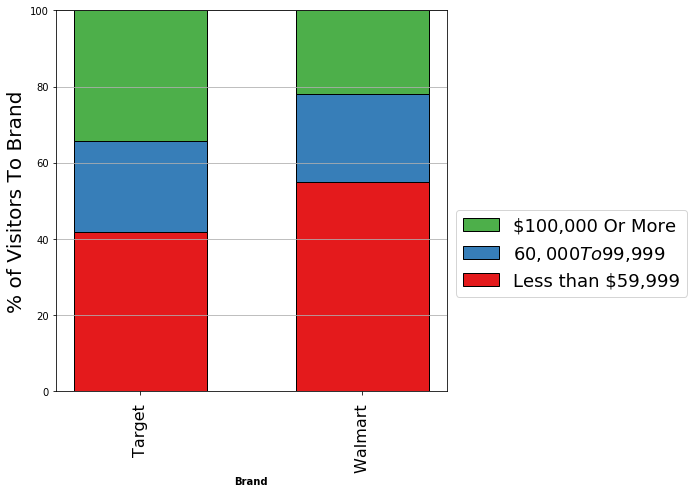

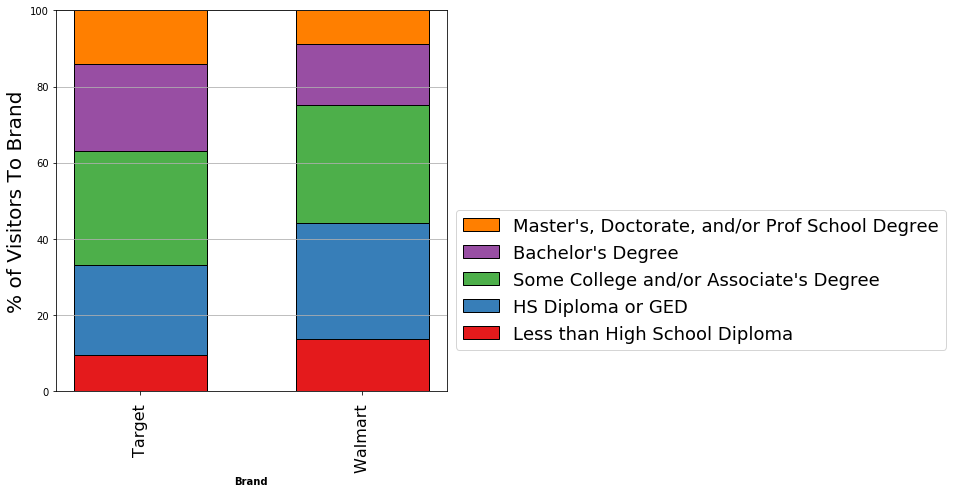

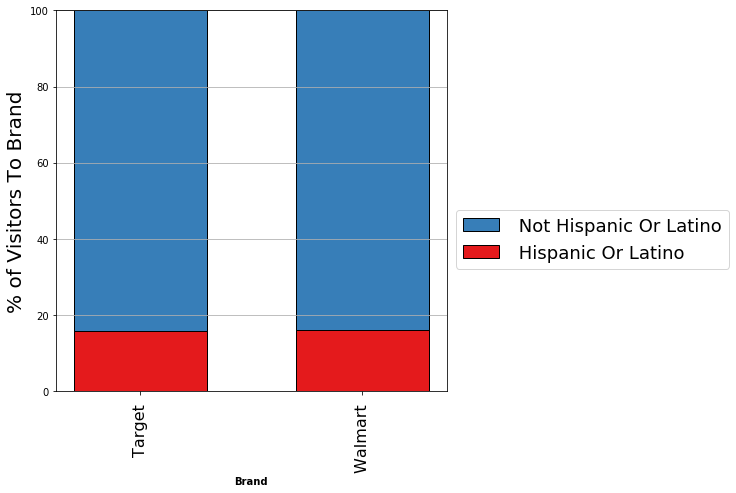

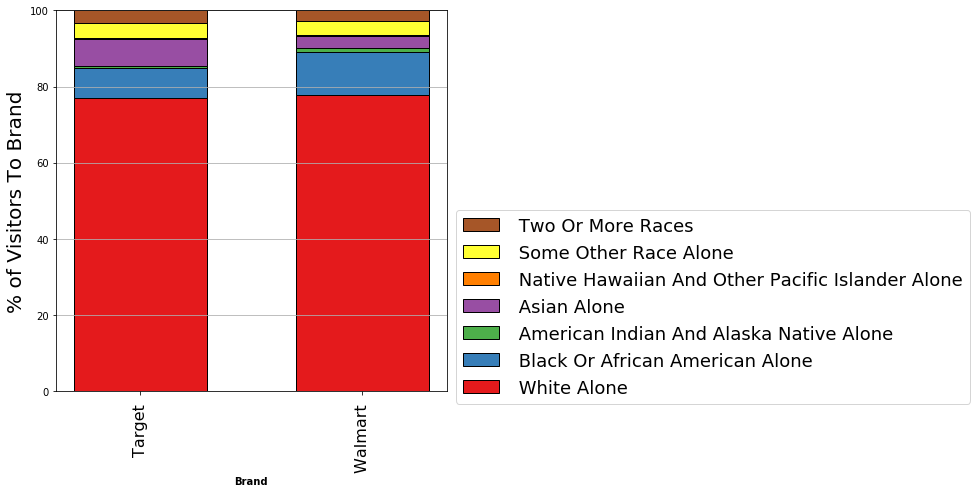

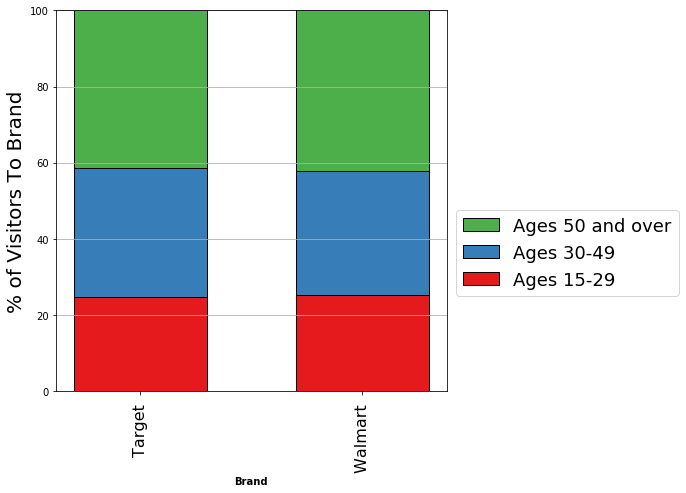

In [0]:
print("Figure 3")
for demo in demos_to_analyze[::-1]:
    demo_codes = dpf.get_final_table_ids(demo)
    data2plot_ = final_results_[final_results_.demo_code.isin(demo_codes)]
    dpf.make_demographics_chart(data2plot_, chart_type='stacked_bar', column_to_plot='visitor_count_POP_D_adj_rate', bar_groups='field_level_2', fig_size=[7,7])

The above charts (Figure 3) show that the customer demographics of Target and Walmart are very similar in terms of Age groups & Hispanic Ethnicity. 

However, there are some interesting differences. Compared to Walmart customers, Target customers are:
* More likely to have a higher income
* More likely to have a higher education level
* More likely to be Asian and 
* Less likely to be African American Or Black

If you want to play around with this analysis more, we built a [streamlined stand-alone workbook](https://colab.research.google.com/drive/13BmucZMu0-UFNnVKoJP4ZuJpGNyQXLln#offline=true&sandboxMode=true) in which you can analyze these Demographics for any brand in the US. 


# \#3 Quantifying Statistical Certainty

We now can analyze multiple demographic dimensions across multiple brands with relative ease!

There are a few steps, but we've bundled them all into a master wrapper function which you can use in a standalone notebook here: [Workbook to Analyze Demographic Profiles from SafeGraph Patterns Data](https://colab.research.google.com/drive/13BmucZMu0-UFNnVKoJP4ZuJpGNyQXLln#offline=true&sandboxMode=true) . Try it out!

We have one remaining technical challenge to discuss: statistical certainty.  



## As sample sizes get smaller, statistics becomes more important

To motivate the need for incorporating statistics into our analysis, let's consider the following question from a skeptical consumer of SafeGraph Patterns data. "OK, in Figure 3 we showed that Target customers have a higher probability of being in a high income group compared to Walmart customers. That's interesting, but is that just because Target's stores are located in wealthier neighborhoods?" 

There are multiple ways to approach this question. One simple way is to analyze the customer demographics for a ***single*** Target and a ***single*** Walmart co-located in close proximity. In other words, we ask:

**When the Target and Walmart are located in the neighborhood, are Target customers still more likely to be in higher income groups than Walmart customers?**

Let's answer this super interesting question. 

When analyzing customer demographics at the national level for major brands with many locations, we are aggregating over many thousands (or 10,000s or 100,000s) of census block groups. We haven't actually calculated this yet, but this turns out to give us immense statistical power. 

However, now we are going to analyze data for a ***single*** Target location and a ***single*** Walmart location. Intuitively, collecting data from a smaller sample size probably means we are going to be more vulnerable to statistical noise and less confident in our estimates. 

**So, how do we know whether the results we see are real or just statistical noise?**


## Just tell me the answer (Statistics Summary)

1. We model each individual data point as a random draw from a Poisson distribution with some unknown rate $\lambda$. 
2. When we sum together all individual data points, the sum of Poissons is a new Poisson with mean and variance equal to the sum of its components.
3. We use the Normal Approximation of a Poisson to estimate confidence intervals around our estimate of the mean.
4. We model each demographic segment independently, and we apply the post-hoc stratified re-weighting to our estimate of the mean (and its confidence interval) for each segment. Extrapolating also widens our confidence intervals, but luckily the [SafeGraph dataset is well sampled](https://blog.safegraph.com/what-about-bias-in-the-safegraph-dataset?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=demo_profile_teachernotebook), so adjustments are minor. 
5. We divide each estimate and confidence interval by total visitors to visualize data as a percent of total visitors. 




This approach allows us to incorporate rigorous confidence intervals into our visualization (we use 95% confidence intervals). 


First, let's re-plot Income Demographics for Target and Walmart when aggregating *all* locations. 

I will take this opportunity to highlight the master wrapper function `master_demo_analysis()` which will re-compute the entire analysis from scratch, this time incorporating the confidence intervals. 



In [0]:
%%time
brands_list = ['Walmart', 'Target']
demos_to_analyze_2 = ['Aggregate Household Income In The Past 12 Months (In 2016 Inflation-Adjusted Dollars)']
visitors_join_2, final_results_2 = dpf.master_demo_analysis(None, 
                                                        None, 
                                                        drive,
                                                        demos_to_analyze_2,
                                                        brands_list, 
                                                        None, 
                                                        verbose=False)

CPU times: user 52.1 s, sys: 4.34 s, total: 56.5 s
Wall time: 1min 4s


Now we plot the confidence intervals using `show_error` = `True`, which shows 95% confidence intervals around the estimate of the mean.

In [0]:
demos_to_analyze_2[0]

'Aggregate Household Income In The Past 12 Months (In 2016 Inflation-Adjusted Dollars)'

Figure 4


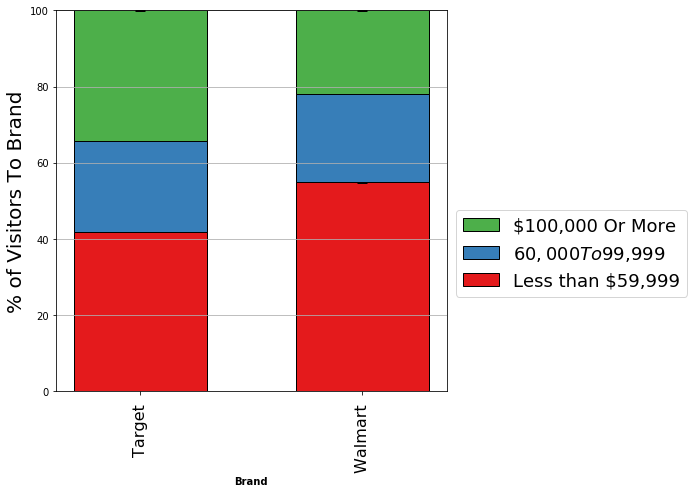

In [0]:
print("Figure 4")
income_demo_ = 'Aggregate Household Income In The Past 12 Months (In 2016 Inflation-Adjusted Dollars)'
data2plot_2 = final_results_2[final_results_2.demo_code.isin(dpf.get_final_table_ids(income_demo_))]
dpf.make_demographics_chart(data2plot_2, chart_type='stacked_bar', show_error=True, fig_size=[7,7])

In [0]:
final_results_2[['brands', 'cbg_count']].drop_duplicates()

,brands,cbg_count
0,Target,162330
1,Walmart,395009


In Figure 4, the error bars show 95% confidence intervals of our estimate of the relative fraction of each demographic segment. You can barely see the confidence intervals, because they are very small. Because our sample size is so large (we measured over 160,000 unique POI-CBG pairs for Target and almost 400,000 POI-CBG pairs for Walmart), we are very confident in our estimate of these rates.

Although each individual measurement is a noisy Poisson with a low rate, summing together 100,000s of small noisy measurements produces a very large number with very little noise in our estimate of the mean.

## Visualizations with Confidence Intervals

Our motivating example for looking at statistics was the following question:

**When a single Target and Walmart are located in the same neighborhood, are Target customers still more likely to be in higher income groups than Walmart customers?**

We can specify an individual location of Target and Walmart using the variable `safegraph_place_id_whitelist`.

In [0]:
%%time
safegraph_place_id_whitelist = ['sg:08a06860e8ec49b0b4cc9d74d8042b06', 'sg:ea46efc2e7744380b1fb1e84491411ed']
brands_list = ['Walmart', 'Target']
demographic_options = {'Sex By Age': True,
                         'Race' : True,
                         'Hispanic Or Latino Origin': True,
                         'Educational Attainment For The Population 25 Years And Over': True, 
                         'Aggregate Household Income In The Past 12 Months (In 2016 Inflation-Adjusted Dollars)': True
                        }
###################
print("This will take about 60 seconds.")
demos_to_analyze = [demo for demo, to_use in demographic_options.items() if to_use]
visitors_join, final_results = dpf.master_demo_analysis(None, 
                                                    None, 
                                                    drive,
                                                    demos_to_analyze,
                                                    brands_list, 
                                                    safegraph_place_id_whitelist, 
                                                    verbose=False)


This will take about 60 seconds.
CPU times: user 46.7 s, sys: 10.8 s, total: 57.5 s
Wall time: 1min 11s


Figure 5


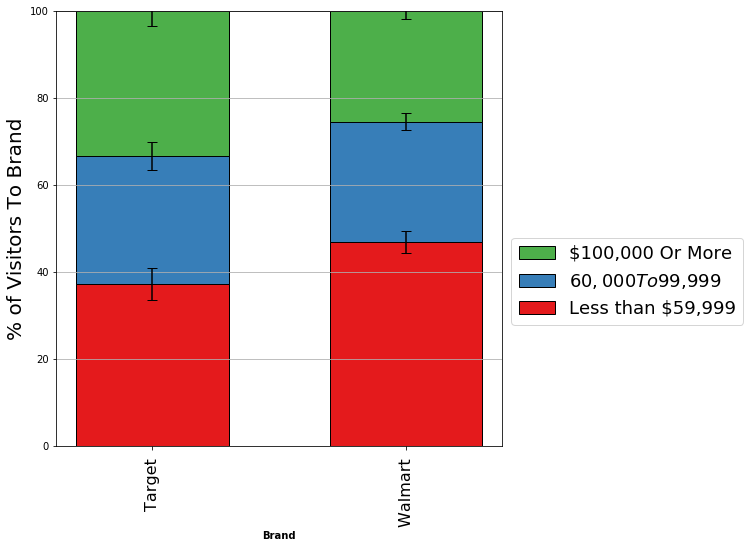

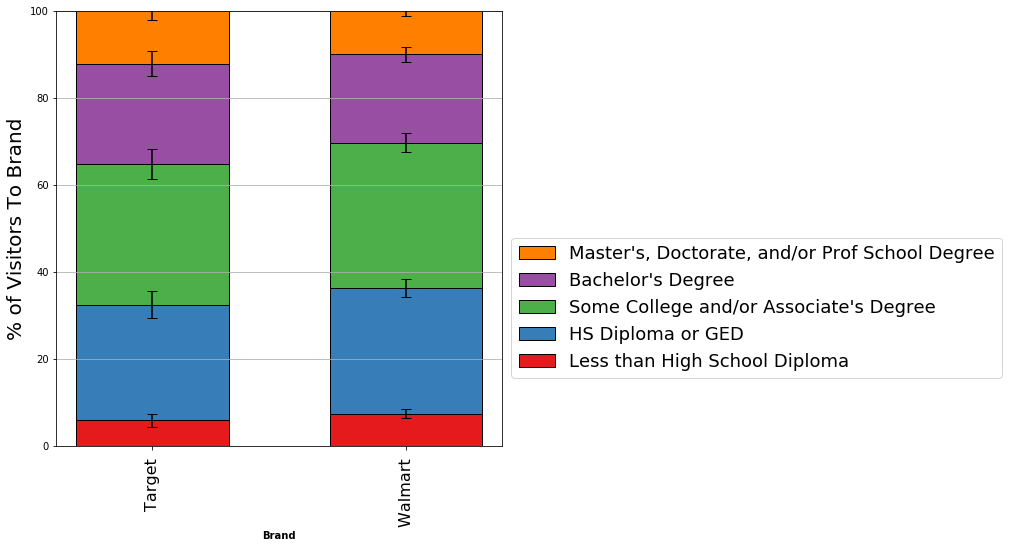

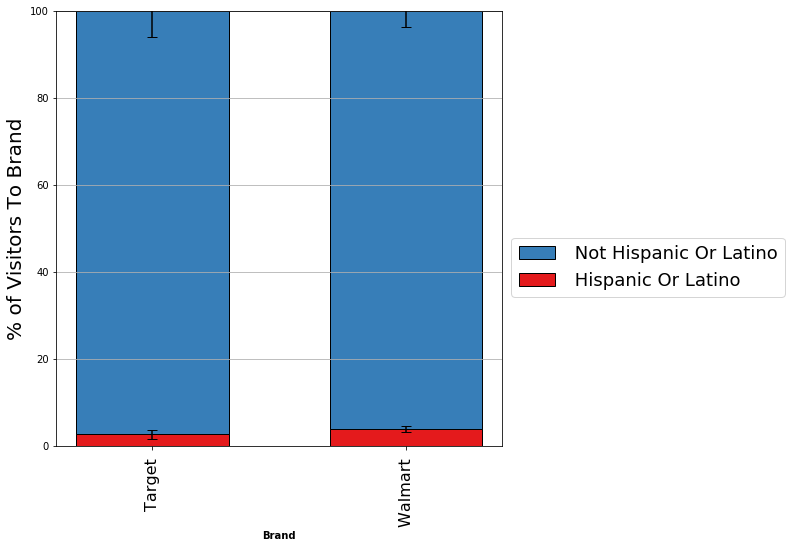

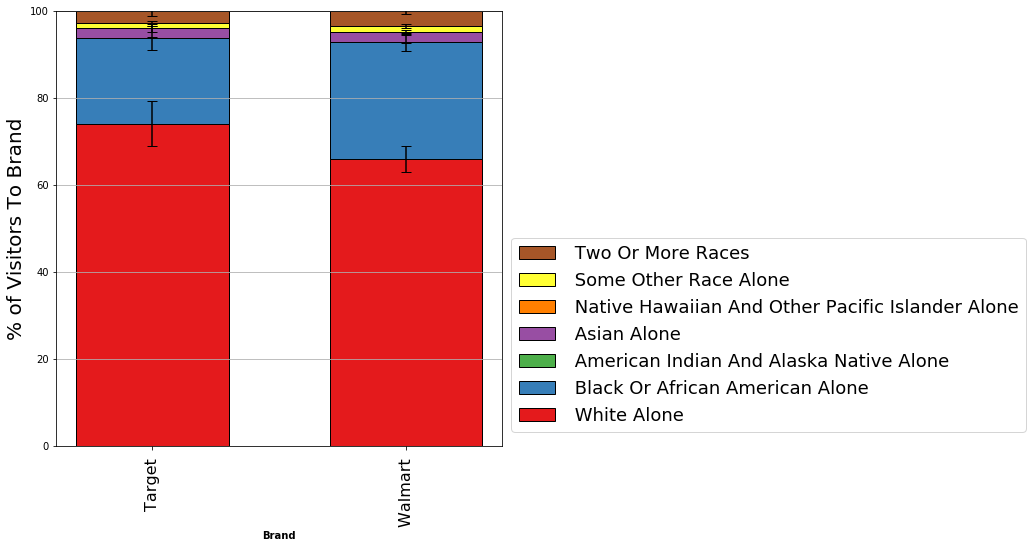

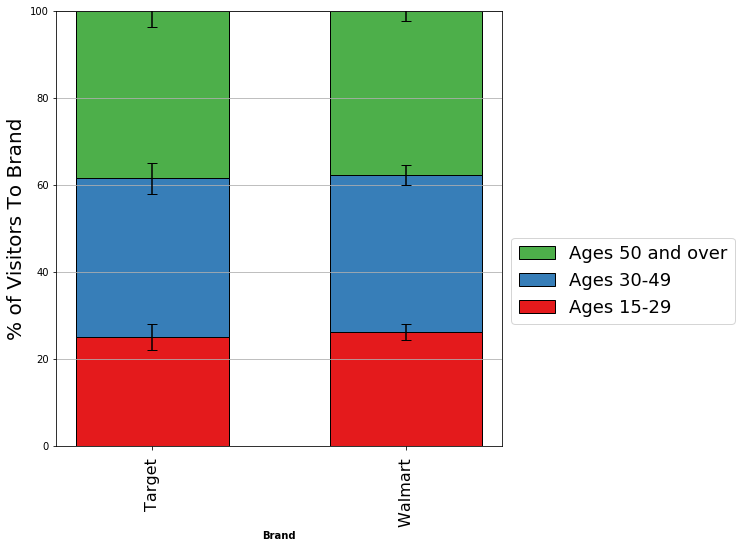

In [0]:
print("Figure 5")
for demo in demos_to_analyze[::-1]:
    demo_codes = dpf.get_final_table_ids(demo)
    data2plot_ = final_results[final_results.demo_code.isin(demo_codes)]
    dpf.make_demographics_chart(data2plot_,  chart_type='stacked_bar', show_error=True, fig_size=[8,8])

In [0]:
final_results[['brands', 'cbg_count']].drop_duplicates()

,brands,cbg_count
0,Target,66
1,Walmart,133


In Figure 5, the error bars show 95% confidence intervals of our estimate of the relative fraction of each demographic segment.

Compared to the national analysis (Figure 4), the estimates are much less certain (wider confidence intervals). This makes sense, because our data sample is much smaller (only 66 CBGs for Target and 133 CBGs for Walmart, compared to the 100,000s at the national level). 

Nonetheless, it is exciting to receive a rigorous answer to our motivating question. 

**When a single Target and Walmart are located in the same neighborhood, are Target customers still more likely to be in higher income groups than Walmart customers?**

For this specific Target and specific Walmart, the answer is yes. There is a separation in the confidence intervals for the low and high income groups between the two brands, showing that this observed differences between the brands are unlikely to be a result of random chance. This shows that SafeGraph patterns can be used to make statistically meaningful demographic profiles even at the level of individual POI. 


-----
If you want to understand exactly how these confidence intervals are calculated, I explain the full data model in detail, below. 

## 3.1 We model each data point as a random draw from a unique Poisson distribution. 

To make statistical statements about our confidence or uncertainty, we need to decide how to model the data. 
Our data is interesting because the individual measurements go through a few transformations and aggregations, which impacts the expected variance of our final measurement. 

Let's start at the beginning, and walk through all of our data transformations to get to the demographic profile. 

The raw data consists of measurements of many `census_block_group`s (CBGs) and many points-of-interest (POI)s (`safegraph_place_id`s). 

For each CBG-POI pair, we have a count of visitors from that particular CBG<sub>i</sub> to a particular POI<sub>j</sub>, which we can model as a random draw from a [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution). 

$N_{i, j} \sim Poisson(\lambda_{i,j})$



Where $\lambda_{i,j}$ is the (unknown) rate parameter representing, on average, how many visitors in the SafeGraph dataset with the home CBG<sub>i</sub> will visit the particular POI<sub>j</sub> in one month.  

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/16/Poisson_pmf.svg/325px-Poisson_pmf.svg.png" alt="Example Poisson Distributions" ALIGN="middle" width=300>


Then, we allocate this measurement of $N$ visitors into different $k$ demographic segments (e.g. `Hispanic Or Latino Origin` or `Not Hispanic Or Latino Origin`).

If we have $N$ visitors from CBG<sub>i</sub> and, on average, $p$ fraction of them are `Hispanic Or Latino Origin`, then the number of `Hispanic Or Latino Origin` is described by a [Binomial](https://en.wikipedia.org/wiki/Binomial) random variable. We know $p$ from the Census (i.e., what is the true fraction of `Hispanic Or Latino Origin` in CBG<sub>i</sub>). So we can model this allocation as a binomial process where each visitor (of $N_{i, j}$ visitors) has a certain probability $p$ of being allocated to demographic segment $k$.

$$DemoVisitors_{i, j, k} \sim Binomial(N_{i, j}, p_{i, k})$$

Where $DemoVisitors_{i, j, k}$ is the number of visitors from CBG<sub>i</sub> visiting POI<sub>j</sub> belonging to Demo_Segment<sub>k</sub>. 

$p_{i, k}$ is the fraction of residents in CBG<sub>i</sub> belonging to Demo_Segment<sub>k</sub> (e.g., 0.15), which we know from the Census. 

However, $DemoVisitors$ will **not** strictly behave as a true binomial random variable. That's because its parameter ($N$) is *itself* a random variable (not a fixed value). This makes $DemoVisitors$ a [compound distribution](https://en.wikipedia.org/wiki/Compound_probability_distribution). Nonetheless, choosing this model is convenient because this particular compound distribution turns out itself to be mathematically equivalent to yet a new Poisson distribution (See [stats.stackexchange](https://stats.stackexchange.com/questions/159225/variance-of-compound-distribution/161779#161779) for some discussion), and for simulations see these simulations. 

So to recap this logic: 

If $N \sim Poisson(\lambda)$ $\,\,$ then, $\,\,$ $Binomial(N, p) = Poisson(\lambda * p)$

Therefore,

$DemoVisitors_{i, j, k} \sim Poisson(\lambda_{i,j} * p_{i, k})$

$DemoVisitors_{i, j, k}$ having $mean$ = $variance$ = $\lambda_{i,j} * p_{i, k}$.

$DemoVisitors$ is our measurement of how many people of a specific demographic segment, from a specific CBG visited a specific POI. The fact that we can model $DemoVisitors$ as a simple Poisson distribution is extremely convenient, because Poisson distributions are familiar statistical territory. 





----

Fine print: Let's document some key assumptions made in the data model so far. 
1. We assume that all CBGs are independent measurements. We are not assuming that each measurement from each CBG is a random draw from *the same* Poisson distribution, rather each CBG is its own independent Poisson. It is totally possible that CBG 1 has a very high rate of visitors while CBG 2 has a very low rate of visitors. This is a convenient and conservative assumption of the model. 
2. We assume that, ***within each CBG*** the SafeGraph data sample is randomly distributed. This is a nuanced point. If we are under-indexed overall on CBG 1 relative to CBG 2, this is a geographic sampling bias that we correct via post-hoc stratified re-weighting (as described in Section 3.1, above). However, if we are over-indexed on Demographic Segment 1 relative to Demographic Segment 2 ***within*** CBG 1, we unfortunately have no way to measure that or correct for it. However, given that (i) diversity within CBGs is usually less than across CBGs and (ii) the dataset is [relatively well sampled across demographic segments when inferred from CBGs](https://blog.safegraph.com/what-about-bias-in-the-safegraph-dataset?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=demo_profile_teachernotebook), this is probably an OK assumption. 
3. In reality we know that a person cannot simultaneously belong to > 1 demographic segment (i.e., a person cannot be both `Hispanic Or Latino Origin` ***and*** `Not Hispanic Or Latino Origin`). However, for simplicity we model each segment independently and treat membership into each segment as its own independent weighted coin flip. This actually hurts (widens) our confidence estimate, because we are throwing away some information, but it makes the math much easier. So this assumption is a conservative assumption for the sake of model simplicity.  

---
OK, we have a solid model for all of our individual data points. 

To get to our final results, we take three additional steps: (i) Sum (ii) Calculate Confidence Intervals (iii) Correct Bias. 

## 3.2 A sum of Poissons is a Poisson

#### Sum Across All POI and CBGs

For each Brand (e.g. `Walmart`) and each demographic_segment<sub>k</sub> (e.g. `Hispanic Or Latino Origin`) we need to sum across all $J$ CBGs and $I$ POIs to get a total count of visitors from Demo_Segment<sub>k</sub> (e.g., `Hispanic`). Our motivating example is to compare a *single* location of Target and a *single* location of Walmart, so in that case $I_{Walmart} = I_{Target} = 1$, but earlier we analyzed thousands of locations in the USA, so the actual number of stores in your analysis will depend on your question.

$$DemoVisitors_{k} = \sum_{j=1}^{J} \sum_{i=1}^{I} DemoVisitors_{i, j, k} $$


Since, each $DemoVisitors_{i, j, k}$ is a poisson random variable, then $DemoVisitors_{k}$ is a sum of many poisson random variables. The [sum of poissons is itself a poisson](https://math.stackexchange.com/questions/221078/poisson-distribution-of-sum-of-two-random-independent-variables-x-y). 

What this means is that even though we calculate $DemoVisitors_{k}$ by summing over many individual lambda_{i, j, k}, for the purposes of quantifying uncertainty,  $DemoVisitors_{k}$ can be modeled as a random draw from a single Poisson distribution with mean $\lambda_{k}$.

$$DemoVisitors_{k} \sim Poisson(\lambda_{k})$$

Where

$$ \lambda_{k} = \sum_{j=1}^{J} \sum_{i=1}^{I} \lambda_{i, j, k} $$

$\lambda_{k}$ is the grand sum of all individual $\lambda_{i, j, k}$ (the individual rate parameters for visitors of CBG<sub>i</sub> belonging to Demo_Segment<sub>k</sub> visiting POI<sub>j</sub>).

Our estimate of $\lambda_{k}$ is the estimate for which we want to quantify our uncertainty. This is our estimate of how many people of Demo_Segment<sub>k</sub> visited this brand.

## 3.3 Use the Normal Approximation to Calculate Confidence Intervals

The whole point of this is that we want to quantify our uncertainty about our estimate of this Poisson rate $\lambda_k$ for each demographic segment $k$.

Although our individual CBG measurements may be small, aggregated together the sums are usually large (i.e. > 100) and we can comfortably use a [normal approximation](https://en.wikipedia.org/wiki/Poisson_distribution#Related_distributions) to approximate $Poisson(\lambda_{k})$ as $Normal(\lambda_{k}, \sqrt{\lambda_{k}})$. Methods to obtain confidence intervals of your estimate of $\lambda_{k}$ in such cases are well documented.  For more details see [stats.stackexchange](https://stats.stackexchange.com/questions/83283/normal-approximation-to-the-poisson-distribution) and [onbiostatisics](http://onbiostatistics.blogspot.com/2014/03/computing-confidence-interval-for.html). 

(Also, confidence intervals are confusing and controversial, but if you want to understand more about what confidence intervals mean, [start here](https://www.quora.com/What-is-the-difference-between-frequentist-confidence-intervals-and-Bayesian-credible-intervals)). 

The takeaway is that we can calculate confidence intervals for a normal distribution with $\mu = \lambda$ and $\sigma = \sqrt{\lambda}$. 

In our visualizations we show 95% confidence intervals around the estimate of the mean. 

If your sums are very small (i.e. < 100), and the normal approximation may not be reasonable, then you should consider calculating confidence intervals using the [exact method](http://onbiostatistics.blogspot.com/2014/03/computing-confidence-interval-for.html). For an implementation in python see [netwon.cx](https://newton.cx/~peter/2012/06/poisson-distribution-confidence-intervals/).

## 3.4 Correct For Geographic Sampling bias via Post-hoc Stratified Re-weighting

The last step is to correct for geographic sampling biases in our data collection. As discussed above in Section 1 and in other posts, we know [there may be some sampling bias in our data samples](https://www.safegraph.com/blog/what-about-bias-in-the-safegraph-dataset?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=demo_profile_teachernotebook), and we need to apply post-hoc stratified re-weighting to correct for it. 

We have computed a re-weighting factor for every Demo_Segment<sub>k</sub>, and we multiply both our estimate of the mean and our confidence interval by this re-weighting factor. If SafeGraph is very under-indexed on a sub-group, then the re-weighting factor will be large, and, accordingly it will expand our confidence intervals by a large amount. If you multiply a distribution by a constant $C$, then you multiply the variance of that distribution by $C^2$. 

If you are paying attention, you may have noticed that we have done something a bit sneaky. When I explained how to do post-hoc stratified re-weighting in Section 1, I explained how we calculate the re-weighting adjustment factor for each individual CBG, based on the Census data,  and *then multiply the CBG visitor count by the re-weighting factor*. Each CBG is its own group (i.e., stratum), and this is a geographic-based sampling correction. In other words, I said that we apply the correction at the level of each individual CBG. But now I am explaining that we are applying re-weighting ***after*** summing together all of these CBGs on each Demo_Segment. Why are we doing this differently than before? And how does it work? 


##### **Why is it different? Why do we correct sampling bias after summing instead of before?**

The necessity of doing the correction ***after*** summing is for statistics. When you multiply a Poisson random variable by a constant, the result is [no longer a Poisson random variable](https://math.stackexchange.com/questions/746760/prove-that-a-constant-multiplied-by-a-poisson-random-variable-is-not-poisson). If the individual measurements are not Poisson random variables, then their sum is no longer a Poisson random variable, which means we no longer know how to model the variance of their sum. 

This is a problem because if we don't know how to model the variance of the sum, then we don't know how to build confidence intervals around our sum. The post-hoc stratified re-weighting correction expands our confidence intervals (we are extrapolating and that means less certainty) If we want to know exactly how much our confidence intervals change, then we need a mathematically rigorous model of the variance of our measurements.  

##### **How does it work? How can we apply geographic-level corrections after we have summed all the geographies together?**

Essentially, we calculate our biases for each CBG, and sum these biases together across CBGs, grouping them by each individual demographic segment. When we apply the correction after summing, we are technically correcting at the level of demographic segments, rather than the level of individual census block groups*. However, the demographic segments are really just a different basis of the same data (we mapped from CBGs to Demographic segments via the Census), so they really are just two different views on the same dataset. Whether you apply the correction on the individual CBG-level data before summing, or on the demographic segment after summing, it's the same correction, and you get the same corrected estimate of the mean in either case. The only difference is that in the latter, you have a rigorous model of the variance of your estimate from which you can calculate confidence intervals, whereas in the former, you don't. If you want to see the calculation of the adjustment factor for a demographic segment or want to dig into how the math works, [here is an example using a simple toy example](https://colab.research.google.com/drive/1GDhVyqpDjxxokXOmWcupLeS6dD7D1WzB).

\* *The adjustment factor for the demographic segment is essentially a ratio of the weighted sums of the corrected cbg-level counts for that segment :: weighted sums of uncorrected cbg-level counts for that segment.*



# Summary

Here we've shown how to use SafeGraph Patterns data to build statistically and methodologically rigorous demographic profiles for brands and individual points-of-interest. 

* We defined a demographic profile through a simple example of a single Walmart store. 
* We explained the 3 major technical challenges: 
  * Measuring and Correcting Sampling Bias
  * Wrangling Census Data
  * Quantifying Statistical Certainty
* We explained how to overcome these technical challenges one by one in detail. 
* We also produced a robust set of re-usable code, available in the stand alone [Workbook to Analyze Demographic Profiles from SafeGraph Patterns Data](https://colab.research.google.com/drive/13BmucZMu0-UFNnVKoJP4ZuJpGNyQXLln#offline=true&sandboxMode=true) . Try it out!
  * You can use this workbook to analyze *any* brand or POI in the USA. 
  * To get the Patterns data, you can use the coupon code `AnalyzeDemographics` for $200 of free data at the [The SafeGraph Data Bar](https://shop.safegraph.com/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=demo_profile_teachernotebook)


---

*Thanks for reading! If you found this useful or interesting please upvote and share with a friend.* 

*You are strongly encouraged to try out a sample of SafeGraph patterns data for free, no strings attached at the [SafeGraph Data Bar](https://shop.safegraph.com/?utm_source=content&utm_medium=referral&utm_campaign=colabnotebook&utm_content=demo_profile_teachernotebook).*  *Use coupon code* **`AnalyzeDemographics`** *for $200 worth of free data!*

---

Contact: 
* Please send us your ideas, feedback, bug discoveries and suggestions: datastories@safegraph.com 
